<h1>A. Data Collection

In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
from sklearn.preprocessing import LabelEncoder
from pylift import TransformedOutcome
from pylift.generate_data import dgp

In [2]:
df_data = pd.read_csv('HR_comma_sep.csv')

In [3]:
df_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<h1>B. Data Preprocessing

In [4]:
#Checking columns that can be safely label encoded
object_cols = [col for col in df_data.columns if df_data[col].dtype == "object"]
good_label_cols = [col for col in object_cols if 
                   set(df_data[col]) == set(df_data[col])]
print('B.1. Columns that can be safely label encoded:\n>>{}'.format(good_label_cols))

#Checking uniques data in Department column
col_to_check1 = 'Department'
uniques = df_data[col_to_check1].unique()
print('\nB.2. All unique data in {} column:\n>>{}'.format(col_to_check1,uniques))

#Checking uniques data in Department column
col_to_check2 = 'salary'
uniques = df_data[col_to_check2].unique()
print('\nB.3. All unique data in {} column:\n>>{}'.format(col_to_check2,uniques))

B.1. Columns that can be safely label encoded:
>>['Department', 'salary']

B.2. All unique data in Department column:
>>['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

B.3. All unique data in salary column:
>>['low' 'medium' 'high']


In [5]:
#Label encoding
label_encoder = LabelEncoder()
for col in good_label_cols:
    df_data[col] = label_encoder.fit_transform(df_data[col])
print("B.4. Label Encoding")
print(">>Label encoding for column {} is successful!".format(good_label_cols))
df_data

B.4. Label Encoding
>>Label encoding for column ['Department', 'salary'] is successful!


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [6]:
#Get total employee attrition
left_count = len(df_data[df_data.left == 1].index)
stay_count = len(df_data[df_data.left == 0].index)
total_count = left_count + stay_count
churn = (left_count/total_count)*100
print("""B.5. Calculate total employee attrition
>>Total employee = {:,} employees
>>Total employee left = {:,} employees
>>Total employee stay = {:,} employees""".format(total_count,left_count,stay_count))
print(">>Total employee attrition = {:.2f}%".format(churn))

B.5. Calculate total employee attrition
>>Total employee = 14,999 employees
>>Total employee left = 3,571 employees
>>Total employee stay = 11,428 employees
>>Total employee attrition = 23.81%


<h1>C. Implementing Uplift Modelling

In [7]:
# Specify your dataframe, treatment column, and outcome column.
up = TransformedOutcome(df_data, col_treatment='promotion_last_5years', col_outcome='left')
print("""C.1. Instantiation
>>Instantiation complete

NOTE: The instantiation step accomplishes several things:
1. Define the transform function and transform the outcome 
   (this is added to the dataframe you pass in, by default, as a new column, TransformedOutcome).
2. Split the data using train_test_split.
3. Set a random state (we like determinism!). This random state is used wherever possible.
4. Define an untransform function and use this to define a scoring function for hyperparameter tuning. 
   The scoring function is saved within up.randomized_search_params and up.grid_search_params, which are dictionaries that are used by default whenever up.randomized_search() or up.grid_search() are called.
5. Define some default hyperparameters.""")


C.1. Instantiation
>>Instantiation complete

NOTE: The instantiation step accomplishes several things:
1. Define the transform function and transform the outcome 
   (this is added to the dataframe you pass in, by default, as a new column, TransformedOutcome).
2. Split the data using train_test_split.
3. Set a random state (we like determinism!). This random state is used wherever possible.
4. Define an untransform function and use this to define a scoring function for hyperparameter tuning. 
   The scoring function is saved within up.randomized_search_params and up.grid_search_params, which are dictionaries that are used by default whenever up.randomized_search() or up.grid_search() are called.
5. Define some default hyperparameters.


[16:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
C.2. Fitting
>>fitting successful


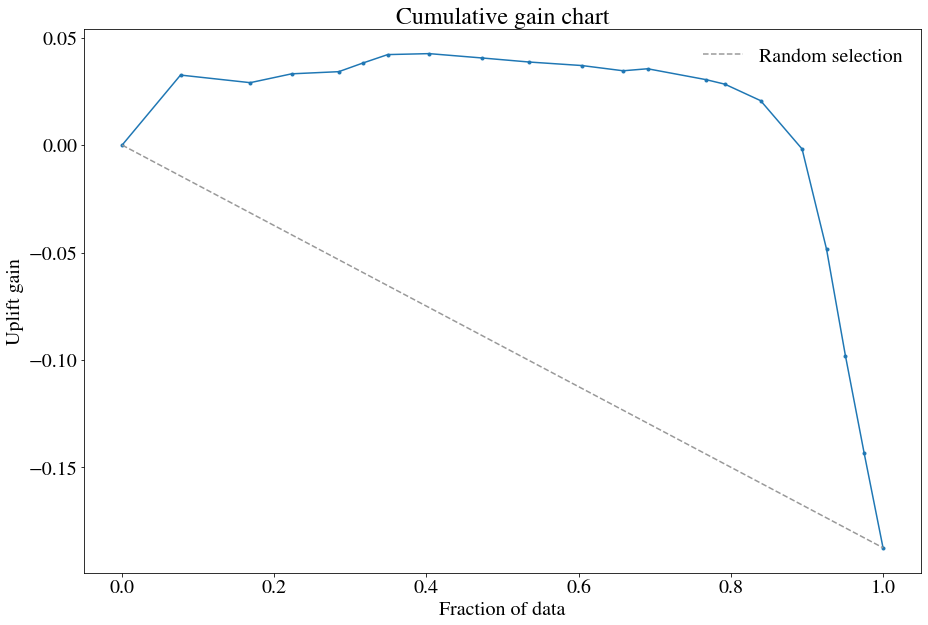

In [8]:
up.fit()
print("C.2. Fitting\n>>fitting successful")
up.plot()

No handles with labels found to put in legend.


C.3. Calculating Cumulative Uplift Curve


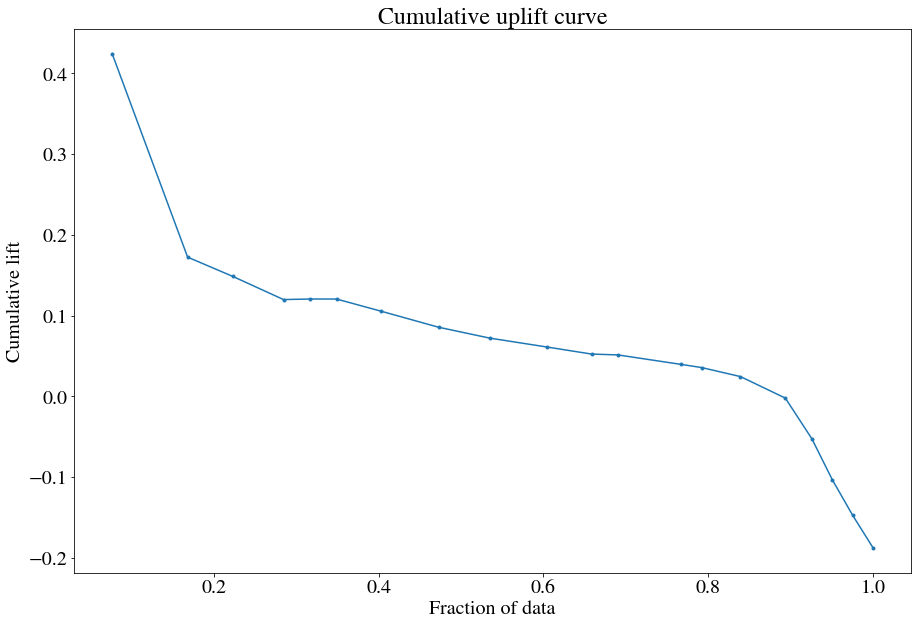

In [9]:
print("C.3. Calculating Cumulative Uplift Curve")
up.plot(plot_type='cuplift')

<h1>D. Evaluate Model

No handles with labels found to put in legend.


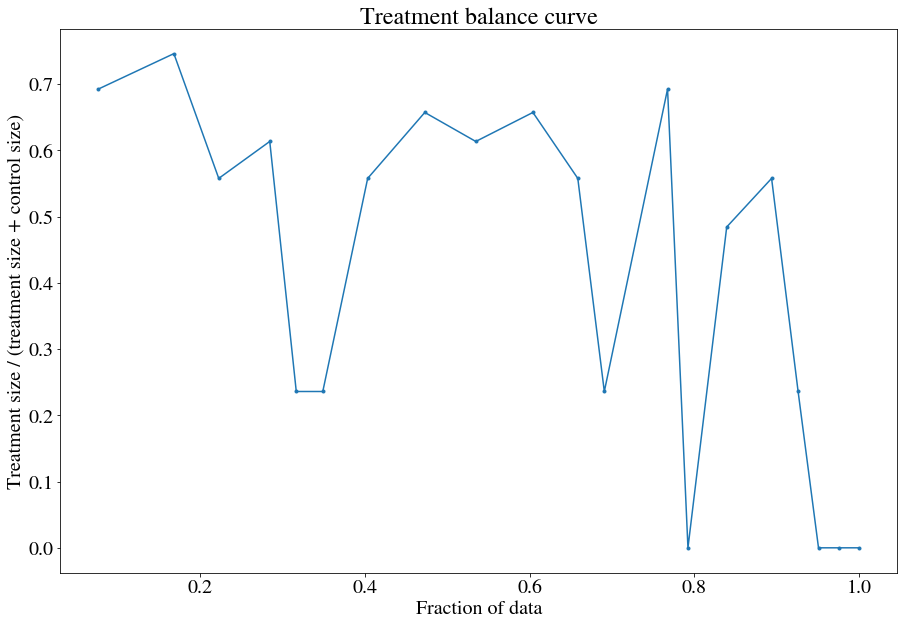

In [10]:
up.plot(plot_type='balance')

Treatment Balance: ratio of treatment group size to total group size within each bin

D.1.a. Calculating Qini Curve


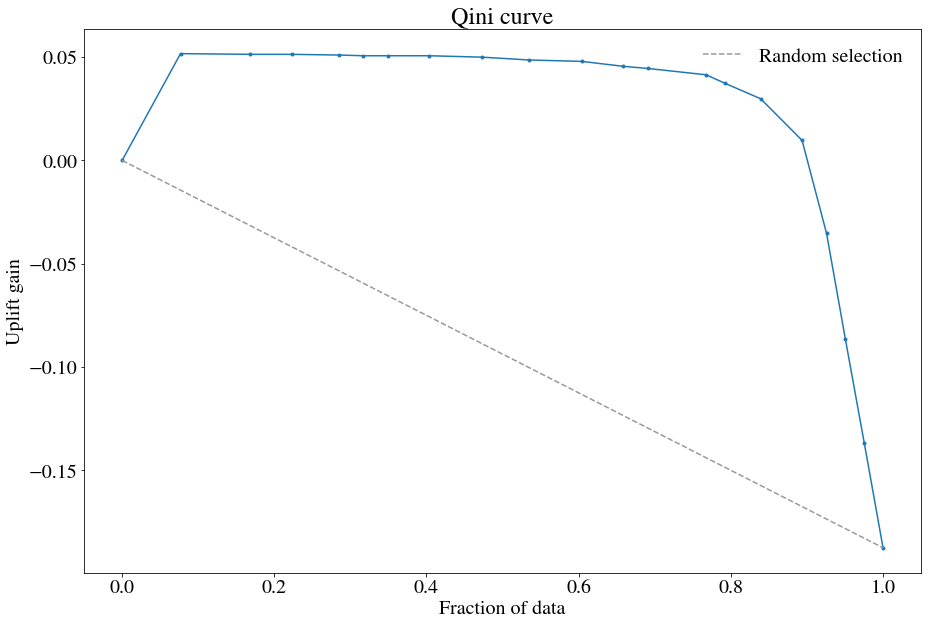

In [11]:
print("D.1.a. Calculating Qini Curve")
up.plot(plot_type='qini')

typical Qini curve (see Radcliffe 2007), normalized by the total number of people in treatment. 

In [12]:
print("D.1.b. Qini Result = {:.2f}%".format(up.test_results_.q1_qini*100))

D.1.b. Qini Result = 81.03%


In [13]:
# Error below:
# up.shuffle_fit()
# up.plot(plot_type='qini', show_shuffle_fits=True)

D.2.a. Calculating Adjusted Qini Curve


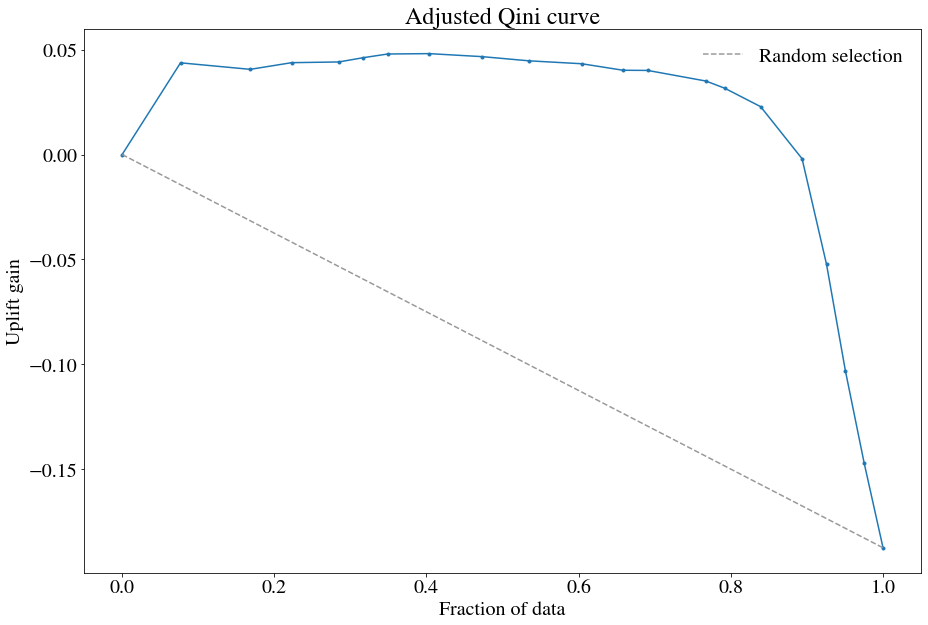

In [14]:
print("D.2.a. Calculating Adjusted Qini Curve")
up.plot(plot_type='aqini')

In [15]:
# Error below:
# up.shuffle_fit()
# up.plot(plot_type='aqini', show_shuffle_fits=True)

In [16]:
print("D.2.b. Adjusted Qini Result = {:.2f}%".format(up.test_results_.q1_qini*100))

D.2.b. Adjusted Qini Result = 81.03%


<h1>Other experiments:

<h2>E. Random Search

In [17]:
up.randomized_search(n_iter=20, n_jobs=10, random_state=1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   17.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=1,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                                      16, 17, 18, 19, 20],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                  

In [18]:
up.fit(**up.rand_search_.best_params_)

[16:54:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


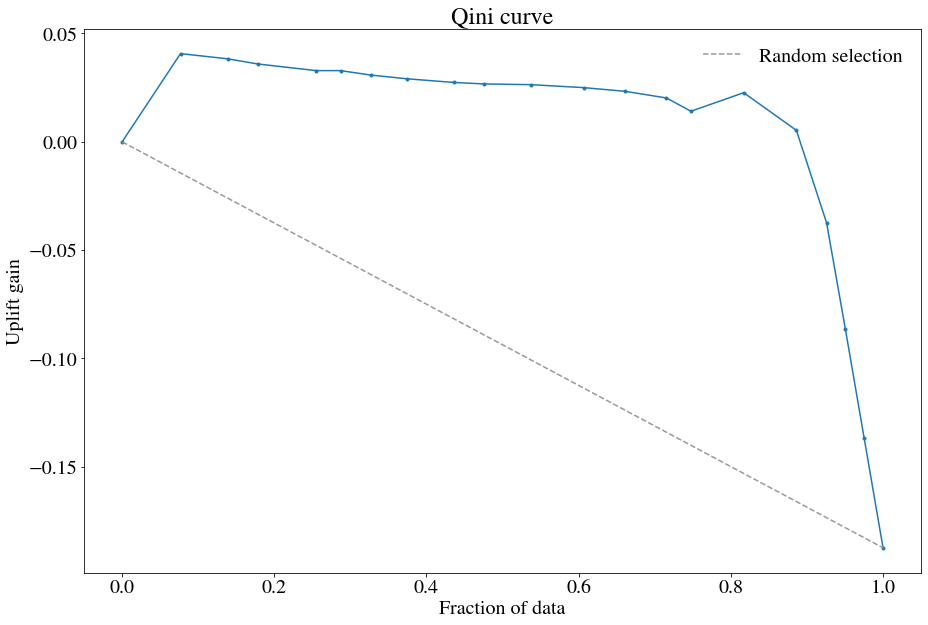

In [19]:
up.plot(plot_type='qini')

In [20]:
up.shuffle_fit(params=up.rand_search_.best_params_, nthread=30, iterations=5);

[16:54:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 0 finished.
[16:54:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 1 finished.
[16:54:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 2 finished.
[16:54:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 3 finished.
[16:54:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 4 finished.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


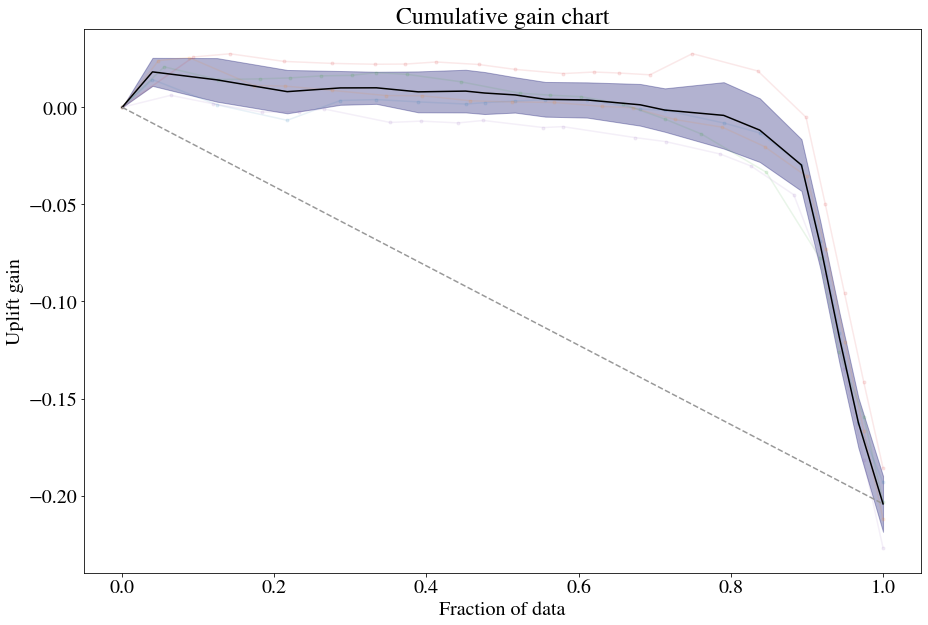

In [21]:
up.plot(show_shuffle_fits=True)

In [22]:
up.noise_fit()

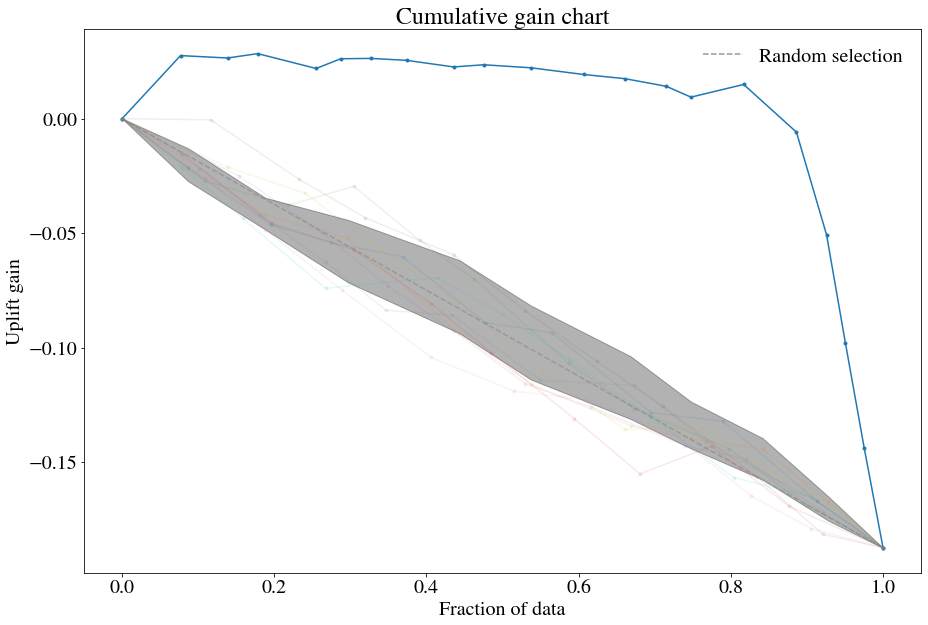

In [23]:
up.plot(show_noise_fits=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


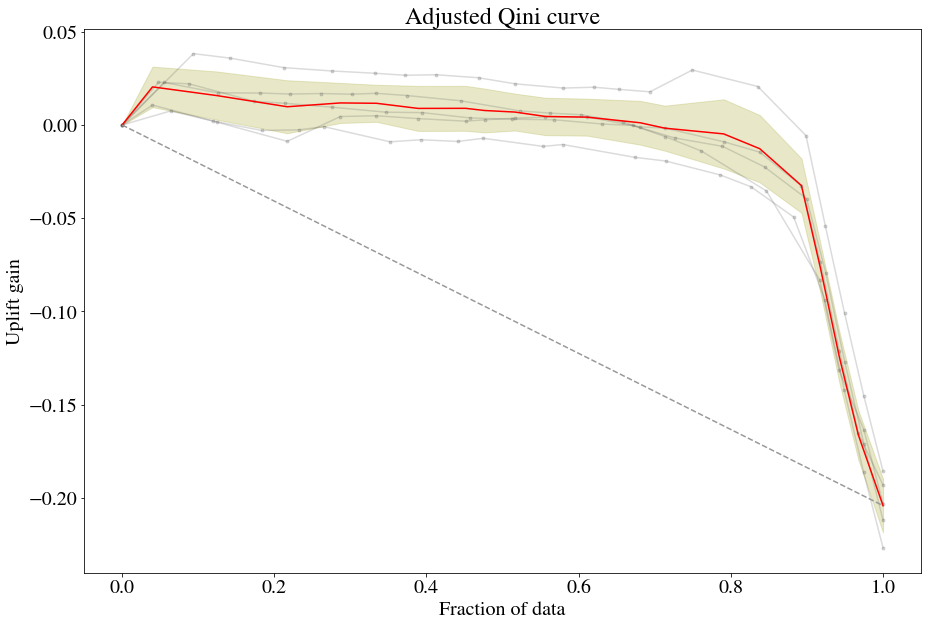

In [24]:
up.plot(plot_type='aqini',
        show_shuffle_fits=True,
        show_random_selection=True,
        shuffle_band_kwargs={'color':[0.7,0.7,0.3], 'alpha':0.3},
        shuffle_lines_kwargs={'color':[0.3,0.3,0.3], 'alpha':0.2},
        shuffle_avg_line_kwargs={'color':[1,0,0]}
       )

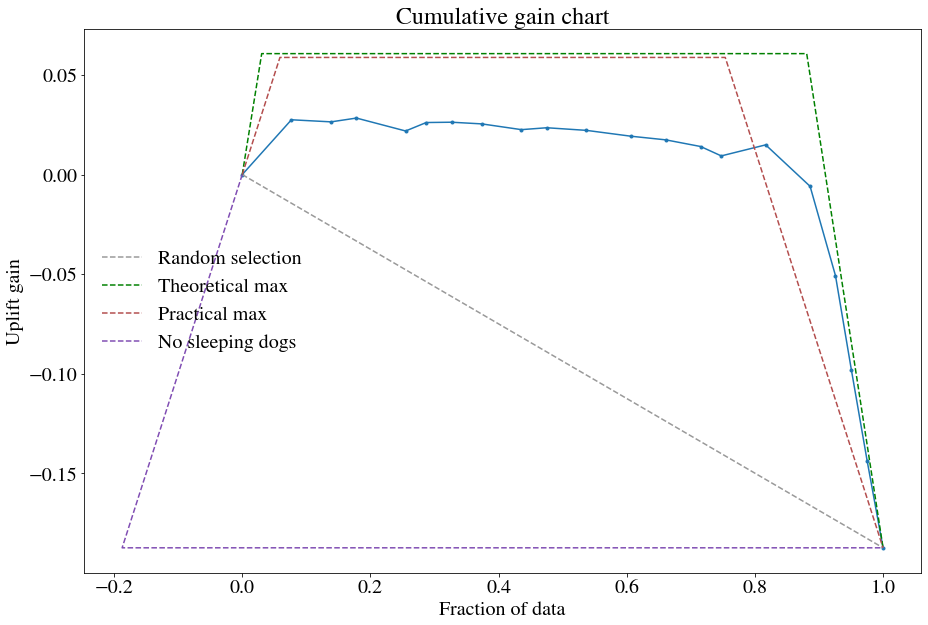

In [25]:
up.plot(show_theoretical_max=True, show_practical_max=True, show_no_dogs=True)